# House Price prediction project

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

You are working as a data scientist at real estate firm, your goal is to estimate fair price of house depending on various factors

# Step 1 - Data Ingestion
Read the training data

In [3]:
import pandas as pd
df = pd.read_csv("training_set.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Step 2 - Perform basic data quality checks

In [4]:
df.shape

(1460, 81)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
m = df.isna().sum()
m[m > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df.select_dtypes(include="object").nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        3
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

# 

# Step 3 - Sepeating X and Y(SalePrice)

In [10]:
X = df.drop(columns = ["Id", "SalePrice"])
Y = df["SalePrice"]


In [11]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [12]:
Y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

Step 4 - Apply train test split

In [13]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=21)

In [14]:
xtrain.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
710,30,RL,56.0,4130,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
1098,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
1286,20,RL,NaN,9790,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
992,60,RL,80.0,9760,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnWw,NaN,0,7,2007,WD,Normal
631,120,RL,34.0,4590,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal


In [15]:
ytrain.head()

710      52000
1098    128000
1286    143000
992     187000
631     209500
Name: SalePrice, dtype: int64

In [16]:
xtest.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
880,20,RL,60.0,7024,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
605,60,RL,85.0,13600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,189,0,NaN,NaN,NaN,0,10,2009,WD,Normal
1166,20,RL,64.0,10475,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
216,20,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
970,50,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml


In [17]:
ytest.head()

880     157000
605     205000
1166    245350
216     210000
970     135000
Name: SalePrice, dtype: int64

In [18]:
xtrain.shape

(1168, 79)

In [19]:
xtest.shape

(292, 79)

Step 5 - Apply preprocessing on X

In [20]:
cat_cols = X.select_dtypes(include="object").columns.to_list()
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [21]:
num_cols = X.select_dtypes(include="number").columns.to_list()
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [23]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [24]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="not_available"),
    OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
    StandardScaler()
)

In [25]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ]
).set_output(transform="pandas")

In [26]:
pre.fit(xtrain)

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [27]:
xtrain_pre = pre.transform(xtrain)
xtrain_pre.head()

,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__GarageType,cat__GarageFinish,cat__GarageQual,cat__GarageCond,cat__PavedDrive,cat__PoolQC,cat__Fence,cat__MiscFeature,cat__SaleType,cat__SaleCondition
710,-0.639505,-0.640097,-0.610390,-2.264159,0.371687,-1.182858,0.877919,-0.580525,-0.968830,-0.274742,...,1.80698,1.908866,1.663409,1.793075,-3.520289,0.064506,0.458715,0.187833,0.308409,0.200871
1098,-0.166757,-0.906459,-0.437322,-1.536438,0.371687,-1.150075,-1.703259,-0.580525,0.496747,-0.274742,...,1.29070,0.796313,0.099108,0.069362,0.306326,0.064506,0.458715,0.187833,0.308409,0.200871
1286,-0.875879,-0.018586,-0.086559,-0.080996,-0.521585,-0.264931,-1.070140,1.882760,0.272112,0.229492,...,-0.77442,0.796313,0.099108,0.069362,0.306326,0.064506,0.458715,0.187833,0.308409,0.200871
992,0.069617,0.425350,-0.089336,-0.080996,2.158232,-0.232148,0.390904,1.276497,0.200142,0.453597,...,-0.77442,-0.316239,0.099108,0.069362,0.306326,0.064506,-0.471457,0.187833,0.308409,0.200871
631,1.487861,-1.616757,-0.567817,1.374445,-0.521585,1.144742,1.024023,0.009352,-0.916488,-0.274742,...,-0.77442,-0.316239,0.099108,0.069362,0.306326,0.064506,0.458715,0.187833,0.308409,0.200871


In [28]:
xtest_pre = pre.transform(xtest)
xtest_pre.head()


,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__GarageType,cat__GarageFinish,cat__GarageQual,cat__GarageCond,cat__PavedDrive,cat__PoolQC,cat__Fence,cat__MiscFeature,cat__SaleType,cat__SaleCondition
880,-0.875879,-0.462522,-0.342552,-0.808717,-0.521585,1.111959,1.024023,-0.580525,1.168470,-0.274742,...,-0.77442,-1.428792,0.099108,0.069362,0.306326,0.064506,0.458715,0.187833,0.308409,0.200871
605,0.069617,0.647318,0.266055,0.646725,0.371687,-0.199365,0.244800,0.380757,0.021307,-0.274742,...,-0.77442,0.796313,0.099108,0.069362,0.306326,0.064506,0.458715,0.187833,0.308409,0.200871
1166,-0.875879,-0.284948,-0.023163,1.374445,-0.521585,1.210308,1.121426,-0.187273,-0.968830,-0.274742,...,-0.77442,-0.316239,0.099108,0.069362,0.306326,0.064506,0.458715,0.187833,0.308409,0.200871
216,-0.875879,-0.240554,-0.210576,0.646725,-0.521585,1.079176,0.926620,0.872322,1.094318,-0.274742,...,-0.77442,0.796313,0.099108,0.069362,0.306326,0.064506,0.458715,0.187833,0.308409,0.200871
970,-0.166757,-0.462522,0.006916,-1.536438,-1.414858,-0.723895,-1.703259,-0.580525,-0.968830,-0.274742,...,1.80698,1.908866,1.663409,1.793075,0.306326,0.064506,0.458715,0.187833,0.308409,-3.508497


Step 6 - Build a base model using LinearRegression

In [29]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(xtrain_pre, ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
model1.score(xtrain_pre, ytrain)

0.8659369195929708

In [31]:
model1.score(xtest_pre, ytest)

0.8023366414636371

# Apply feature selection

In [32]:
from sklearn.feature_selection import SequentialFeatureSelector

m = LinearRegression()
sel = SequentialFeatureSelector(m, n_features_to_select="auto", direction="forward", scoring="r2")
sel.fit(xtrain_pre, ytrain)

,estimator,LinearRegression()
,n_features_to_select,'auto'
,tol,None
,direction,'forward'
,scoring,'r2'
,cv,5
,n_jobs,None
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [33]:
sel.get_feature_names_out()

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__MasVnrArea',
       'num__GrLivArea', 'num__BsmtFullBath', 'num__BsmtHalfBath',
       'num__KitchenAbvGr', 'num__GarageCars', 'num__WoodDeckSF',
       'num__EnclosedPorch', 'num__ScreenPorch', 'num__PoolArea',
       'num__YrSold', 'cat__MSZoning', 'cat__Street', 'cat__Alley',
       'cat__Utilities', 'cat__LotConfig', 'cat__Neighborhood',
       'cat__Condition2', 'cat__RoofStyle', 'cat__RoofMatl',
       'cat__Exterior1st', 'cat__MasVnrType', 'cat__ExterQual',
       'cat__BsmtQual', 'cat__BsmtCond', 'cat__BsmtExposure',
       'cat__BsmtFinType1', 'cat__Heating', 'cat__KitchenQual',
       'cat__Functional', 'cat__FireplaceQu', 'cat__GarageType',
       'cat__MiscFeature', 'cat__SaleCondition'], dtype=object)

In [34]:
xtrain_pre_sel = sel.transform(xtrain_pre)
xtrain_pre_sel

array([[-0.63950486, -0.61039033, -2.26415907, ...,  1.80697972,
         0.1878327 ,  0.20087116],
       [-0.16675696, -0.43732241, -1.53643816, ...,  1.2906998 ,
         0.1878327 ,  0.20087116],
       [-0.87587881, -0.08655908, -0.08099633, ..., -0.77441988,
         0.1878327 ,  0.20087116],
       ...,
       [ 0.54236488, -0.26897452, -0.08099633, ...,  1.2906998 ,
         0.1878327 , -3.50849671],
       [ 0.77873883, -0.27739654, -0.80871725, ..., -0.77441988,
         0.1878327 ,  0.20087116],
       [ 3.1424783 , -0.03176966, -0.08099633, ..., -0.77441988,
         0.1878327 ,  0.20087116]], shape=(1168, 39))

In [35]:
xtrain_pre_sel.shape

(1168, 39)

In [36]:
xtest_pre_sel = sel.transform(xtest_pre)
xtest_pre_sel

array([[-0.87587881, -0.34255152, -0.80871725, ..., -0.77441988,
         0.1878327 ,  0.20087116],
       [ 0.06961698,  0.26605524,  0.64672458, ..., -0.77441988,
         0.1878327 ,  0.20087116],
       [-0.87587881, -0.02316254,  1.37444549, ..., -0.77441988,
         0.1878327 ,  0.20087116],
       ...,
       [ 2.43335646, -0.78743788, -1.53643816, ..., -0.77441988,
         0.1878327 ,  0.20087116],
       [-0.16675696, -0.20779917, -0.80871725, ...,  1.2906998 ,
         0.1878327 , -3.50849671],
       [ 2.43335646, -0.81214865, -0.08099633, ..., -0.77441988,
         0.1878327 ,  0.20087116]], shape=(292, 39))

# Build Linear regression on selected features

In [37]:
model2 = LinearRegression()
model2.fit(xtrain_pre_sel, ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
model2.score(xtrain_pre_sel, ytrain)

0.8526217836955535

In [39]:
model2.score(xtest_pre_sel, ytest)

0.802488846530939

# Implenting Ridge and Lasso

In [40]:
params = {
    "alpha": [0.1, 1, 10, 50, 100, 200, 500, 1000]
}

In [41]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

model_ridge = Ridge(random_state=42)
gscv_ridge = GridSearchCV(model_ridge, param_grid=params, scoring="r2", cv=5)
gscv_ridge.fit(xtrain_pre_sel, ytrain)

,estimator,Ridge(random_state=42)
,param_grid,"{'alpha': [0.1, 1, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,50


In [42]:
gscv_ridge.best_params_


{'alpha': 50}

In [43]:
gscv_ridge.best_score_

np.float64(0.8401653409106903)

In [44]:
best_ridge = gscv_ridge.best_estimator_
best_ridge

,alpha,50
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,42


In [45]:
best_ridge.score(xtrain_pre_sel, ytrain)

0.8521278001950147

In [46]:
best_ridge.score(xtest_pre_sel, ytest)

0.805678309070998

# Lasso

In [47]:
params

{'alpha': [0.1, 1, 10, 50, 100, 200, 500, 1000]}

In [48]:
from sklearn.linear_model import Lasso 
model_lasso = Lasso(random_state=42)
gscv_lasso = GridSearchCV(model_lasso, param_grid=params, scoring="r2", cv=5)
gscv_lasso.fit(xtrain_pre_sel, ytrain)

,estimator,Lasso(random_state=42)
,param_grid,"{'alpha': [0.1, 1, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,50


In [49]:
gscv_lasso.best_params_


{'alpha': 50}

In [50]:
gscv_lasso.best_score_

np.float64(0.8391726254434545)

In [51]:
best_lasso = gscv_lasso.best_estimator_
best_lasso

,alpha,50
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,42
,selection,'cyclic'


In [52]:
best_lasso.score(xtrain_pre_sel, ytrain)

0.8526046932354947

In [53]:
best_lasso.score(xtest_pre_sel, ytest)

0.8026904213722564

# Selected model is Ridge because of Score is more than 0.8 in both train and test

In [54]:
best_ridge

,alpha,50
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,42


# Step - Out of Sample prediction

In [56]:
xnew = pd.read_csv("testing_set.csv")
xnew.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [57]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__GarageType,cat__GarageFinish,cat__GarageQual,cat__GarageCond,cat__PavedDrive,cat__PoolQC,cat__Fence,cat__MiscFeature,cat__SaleType,cat__SaleCondition
0,-0.875879,0.425350,0.082992,-0.808717,0.371687,-0.330497,-1.167543,-0.580525,0.051840,0.621675,...,-0.77442,0.796313,0.099108,0.069362,0.306326,0.064506,-1.401629,0.187833,0.308409,0.200871
1,-0.875879,0.469744,0.327786,-0.080996,0.371687,-0.428847,-1.313647,0.009352,1.044157,-0.274742,...,-0.77442,0.796313,0.099108,0.069362,0.306326,0.064506,0.458715,-9.672329,0.308409,0.200871
2,0.069617,0.158989,0.287342,-0.808717,-0.521585,0.849694,0.634412,-0.580525,0.756276,-0.274742,...,-0.77442,-1.428792,0.099108,0.069362,0.306326,0.064506,-1.401629,0.187833,0.308409,0.200871
3,0.069617,0.336563,-0.069160,-0.080996,0.371687,0.882477,0.634412,-0.471289,0.344083,-0.274742,...,-0.77442,-1.428792,0.099108,0.069362,0.306326,0.064506,0.458715,0.187833,0.308409,0.200871
4,1.487861,-1.217214,-0.529409,1.374445,-0.521585,0.685779,0.342203,-0.580525,-0.395248,-0.274742,...,-0.77442,-0.316239,0.099108,0.069362,0.306326,0.064506,0.458715,0.187833,0.308409,0.200871


In [58]:
xnew_pre_sel = sel.transform(xnew_pre)
xnew_pre_sel[0:5]

array([[-8.75878806e-01,  8.29919540e-02, -8.08717248e-01,
         3.71686964e-01, -3.30497381e-01, -5.80525166e-01,
        -1.19228469e+00, -8.07776769e-01, -2.37225971e-01,
        -2.17077787e-01, -1.02779473e+00,  3.62465731e-01,
        -3.57599824e-01,  1.89890452e+00, -7.10687717e-02,
         1.64612035e+00, -1.57835804e+00,  6.55684843e-02,
         2.44505848e-01, -2.92728207e-02,  6.03956709e-01,
        -4.82874112e-02, -1.76153553e-02, -4.97673977e-01,
        -1.24732234e-01,  7.51349631e-01,  7.97616588e-01,
         6.81882689e-01,  7.64180587e-01,  2.27563300e-01,
         6.01700371e-01,  6.26900730e-01, -1.20231502e-01,
         8.07063929e-01,  2.53214657e-01,  8.63306566e-01,
        -7.74419881e-01,  1.87832697e-01,  2.00871162e-01],
       [-8.75878806e-01,  3.27785885e-01, -8.09963345e-02,
         3.71686964e-01, -4.28846665e-01,  9.35244822e-03,
        -3.64294022e-01, -8.07776769e-01, -2.37225971e-01,
        -2.17077787e-01, -1.02779473e+00,  2.37335606e+

In [59]:
preds = best_ridge.predict(xnew_pre_sel)
preds

array([110393.65570502, 146472.28499612, 166271.46431676, ...,
       161546.49612809, 112002.87877862, 225625.06847249], shape=(1459,))

# Show the results as id and saleprice

In [60]:
res = xnew[["Id"]]
res["SalePrice"] = preds.round(2)

In [61]:
res

,Id,SalePrice
0,1461,110393.66
1,1462,146472.28
2,1463,166271.46
3,1464,175486.87
4,1465,194424.24
...,...,...
1454,2915,73739.27
1455,2916,68948.74
1456,2917,161546.50
1457,2918,112002.88


<Axes: xlabel='SalePrice', ylabel='Count'>

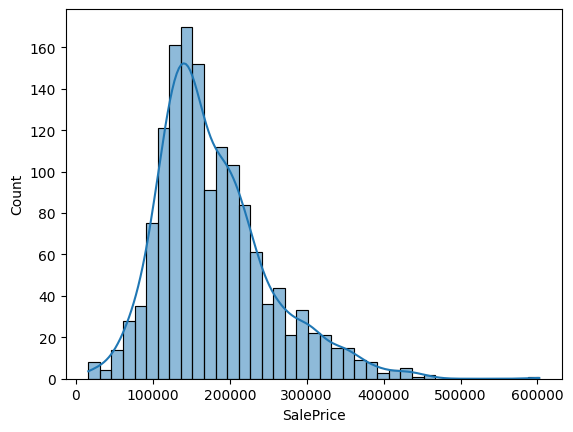

In [62]:
import seaborn as sns
sns.histplot(res["SalePrice"], kde=True)

In [63]:
res.to_csv("ridge_results.csv", index=False)


# Save the model object, preprocessor and selector

In [65]:
import joblib

joblib.dump(best_ridge, "ridge_model.joblib")

['ridge_model.joblib']

In [66]:
joblib.dump(pre, "pre.joblib")

['pre.joblib']

In [67]:
joblib.dump(sel, "sel.joblib")

['sel.joblib']

# Load the model objects

In [68]:
m = joblib.load("ridge_model.joblib")
m

,alpha,50
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,42


In [69]:
m.score(xtest_pre_sel, ytest)

0.805678309070998

In [70]:
p = joblib.load("pre.joblib")
p

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [71]:
s = joblib.load("sel.joblib")
s

,estimator,LinearRegression()
,n_features_to_select,'auto'
,tol,None
,direction,'forward'
,scoring,'r2'
,cv,5
,n_jobs,None
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
